In [5]:
## Variables

In [752]:
srr_name <- "SRR12091998"
donor_name <- "sars-cov-2"
recipient_name <- "USCShg38"
inputs_folder <- "../../wallaby/workflows/datasets/sars-cov-2/"
donor_ref_genome <- "../../wallaby/data/ref_genomes/hpv/HPV16.fasta"
recipient_ref_genome <- "../../wallaby/data/ref_genomes/human/USCS.hg38.fasta"

# Tertiary analysis of a Donor-to-Recipient pipeline

In [689]:
## Setup Environment

In [690]:
# Enable multithreading when possible (library dependent)
options(Ncpus = parallel::detectCores())
Sys.setenv(OMP_NUM_THREADS=toString(parallel::detectCores()))
Sys.setenv(OMP_THREAD_LIMIT=toString(parallel::detectCores()))
Sys.setenv(OMP_NUM_THREADS=parallel::detectCores())
Sys.setenv(OMP_THREAD_LIMIT=parallel::detectCores())

# Install tricky packages
suppressMessages(install.packages("../../BSgenome.Hsapiens.UCSC.hg38_1.4.3.tar.gz", repos = NULL, type = "source"))
suppressPackageStartupMessages(library(BSgenome.Hsapiens.UCSC.hg38))

## Load or install and load all libraries
suppressPackageStartupMessages(library("pacman", character.only = TRUE))

# List of CRAN packages to either Load, or Install and Load
pacman::p_load(dplyr, 
               ggplot2, shiny, shinyLP, DT,  ggrepel,  tidyr, data.table, 
               kableExtra, knitr, IRdisplay)

# List of Bioconductor packages to either Load, or Install and Load
pacman::p_load(GenomicFeatures, GenomicAlignments,  Rsubread,  Rsamtools, bamsignals,  
               rtracklayer, GenomicRanges, org.Hs.eg.db, Organism.dplyr,
               TxDb.Hsapiens.UCSC.hg38.knownGene,  regioneR, karyoploteR,  seqinr, Repitools, Gviz, Biostrings)

In [691]:
## Helper Functions

In [692]:
## Loading pipeline output files
# Try to open all files - note that some will not exists as that specific crossing bucket did not return any matches

In [753]:
# Variables to hold all file paths  
try(donor_MMd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MMr.bam", sep = ""))
try(donor_MMd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MUr.bam", sep = ""))
try(donor_MMd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UMr.bam", sep = ""))
try(donor_MMd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UUr.bam", sep = ""))
try(donor_MUd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MMr.bam", sep = ""))
try(donor_MUd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MUr.bam", sep = ""))
try(donor_MUd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UMr.bam", sep = ""))
try(donor_MUd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UUr.bam", sep = ""))
try(donor_UMd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MMr.bam", sep = ""))
try(donor_UMd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MUr.bam", sep = ""))
try(donor_UMd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UMr.bam", sep = ""))
try(donor_UMd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UUr.bam", sep = ""))
try(donor_UUd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MMr.bam", sep = ""))
try(donor_UUd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MUr.bam", sep = ""))
try(donor_UUd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UMr.bam", sep = ""))
try(donor_UUd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UUr.bam", sep = ""))

In [754]:
# Variables to hold all file paths  
try(recip_MMd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MMr.bam", sep = ""))
try(recip_MMd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MUr.bam", sep = ""))
try(recip_MMd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UMr.bam", sep = ""))
try(recip_MMd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UUr.bam", sep = ""))
try(recip_MUd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MMr.bam", sep = ""))
try(recip_MUd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MUr.bam", sep = ""))
try(recip_MUd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UMr.bam", sep = ""))
try(recip_MUd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UUr.bam", sep = ""))
try(recip_UMd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MMr.bam", sep = ""))
try(recip_UMd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MUr.bam", sep = ""))
try(recip_UMd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UMr.bam", sep = ""))
try(recip_UMd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UUr.bam", sep = ""))
try(recip_UUd_MMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MMr.bam", sep = ""))
try(recip_UUd_MUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MUr.bam", sep = ""))
try(recip_UUd_UMr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UMr.bam", sep = ""))
try(recip_UUd_UUr.bam <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UUr.bam", sep = ""))

In [755]:
# Variables to hold all file paths  
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MMr.bed", sep = "")
if (file.exists(file)) {donor_MMd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_MUr.bed", sep = "")
if (file.exists(file)) {donor_MMd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UMr.bed", sep = "")
if (file.exists(file)) {donor_MMd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MMd_UUr.bed", sep = "")
if (file.exists(file)) {donor_MMd_UUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MMr.bed", sep = "")
if (file.exists(file)) {donor_MUd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_MUr.bed", sep = "")
if (file.exists(file)) {donor_MUd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UMr.bed", sep = "")
if (file.exists(file)) {donor_MUd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_MUd_UUr.bed", sep = "")
if (file.exists(file)) {donor_MUd_UUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MMr.bed", sep = "")
if (file.exists(file)) {donor_UMd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_MUr.bed", sep = "")
if (file.exists(file)) {donor_UMd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UMr.bed", sep = "")
if (file.exists(file)) {donor_UMd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UMd_UUr.bed", sep = "")
if (file.exists(file)) {donor_UMd_UUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MMr.bed", sep = "")
if (file.exists(file)) {donor_UUd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_MUr.bed", sep = "")
if (file.exists(file)) {donor_UUd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UMr.bed", sep = "")
if (file.exists(file)) {donor_UUd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', donor_name, sep = ""),"_UUd_UUr.bed", sep = "")
if (file.exists(file)) {donor_UUd_UUr <- import(file)}

In [756]:
# Variables to hold all file paths  
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MMr.bed", sep = "")
if (file.exists(file)) {recip_MMd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_MUr.bed", sep = "")
if (file.exists(file)) {recip_MMd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UMr.bed", sep = "")
if (file.exists(file)) {recip_MMd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MMd_UUr.bed", sep = "")
if (file.exists(file)) {recip_MMd_UUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MMr.bed", sep = "")
if (file.exists(file)) {recip_MUd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_MUr.bed", sep = "")
if (file.exists(file)) {recip_MUd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UMr.bed", sep = "")
if (file.exists(file)) {recip_MUd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_MUd_UUr.bed", sep = "")
if (file.exists(file)) {recip_MUd_UUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MMr.bed", sep = "")
if (file.exists(file)) {recip_UMd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_MUr.bed", sep = "")
if (file.exists(file)) {recip_UMd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UMr.bed", sep = "")
if (file.exists(file)) {recip_UMd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UMd_UUr.bed", sep = "")
if (file.exists(file)) {recip_UMd_UUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MMr.bed", sep = "")
if (file.exists(file)) {recip_UUd_MMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_MUr.bed", sep = "")
if (file.exists(file)) {recip_UUd_MUr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UMr.bed", sep = "")
if (file.exists(file)) {recip_UUd_UMr <- import(file)}
file <- paste(inputs_folder, paste(srr_name, '-to-', recipient_name, sep = ""),"_UUd_UUr.bed", sep = "")
if (file.exists(file)) {recip_UUd_UUr <- import(file)}

In [ ]:
src <- suppressMessages(src_organism("TxDb.Hsapiens.UCSC.hg38.knownGene"))

In [757]:
create_viz <- function(graph_type = "recipient", ref_genome = "hg38", granges, granges_labels, title_prepend = "") {

    plot.type <- 4
    tracks <- length(granges)
    track_sep <- 0.05
    track_width <- 1 / (tracks) - track_sep
    
    if (graph_type == "donor"){
        summary_fasta <- summary(read.fasta(ref_genome))
        total_genome_length <- as.integer(summary_fasta[, "Length"])
        seqname <- unique(as.character(seqnames(granges[[1]])))
        custom.genome <- toGRanges(data.frame(chr = c(seqname), start = c(1), end = c(total_genome_length)))
        window.size <- 10
    } else if (graph_type == "recipient") {
        genome = "hg38"
        window.size <- 1e6
    }
    
    title <- paste(title_prepend, "- reads density graph - window size (in bases): ", window.size)
    pp <- getDefaultPlotParams(plot.type=plot.type)
    pp$leftmargin <- 0.17
    
    if (graph_type == "donor"){ 
        kp <- plotKaryotype(genome = custom.genome,
                            plot.type = plot.type, 
                            plot.params = pp, 
                            labels.plotter = NULL, 
                            main = title,
                            cex = 2)
        kpAddBaseNumbers(kp, tick.dist = window.size * 50, add.units = TRUE, cex = 2) 
    } 
    else if (graph_type == "recipient") { 
        kp <- plotKaryotype(genome = ref_genome,
                            plot.type = plot.type, 
                            plot.params = pp, 
                            labels.plotter = NULL, 
                            main = title,
                            cex = 2)
        kpAddChromosomeNames(kp, srt = 90, cex = 2) 
    }
    
    track_no <- 0
    for (grange in granges) {
        track_no <- track_no + 1
        
        r0 <- (track_no-1) * track_width + (track_no-1) * track_sep
        r1 <- track_no * track_width + (track_no-1) * track_sep
        
        kp <- suppressWarnings(kpPlotDensity(kp, data = grange, window.size = window.size, col = "blue", r0 = r0, r1 = r1))
        kpAxis(kp, ymax = kp$latest.plot$computed.values$max.density, cex = 2, r0 = r0, r1 = r1)
        kpAddLabels(kp, labels = granges_labels[track_no], r0 = r0, r1 = r1, label.margin = 0.07, cex = 2)
    }
}
print_summary_table <- function(table_type = "recipient", granges, granges_labels, min_num_crossings = 3, min_num_reads = 3){
    granges_df <- lapply(granges, annoGR2DF)
    names(granges_df) <- granges_labels
    merged_df <- bind_rows(granges_df, .id = "crossing")
    merged_dt <- as.data.table(merged_df)

    ## Interval per chromosome
    merged_dt[,group := { ir <- IRanges(start, end); subjectHits(findOverlaps(ir, reduce(ir))) }, by = chr]
    merged_final <- merged_dt[, list(start=min(start), 
                                     stop=max(end), 
                                     num_crossings=length(unique(list(crossing)[[1]])),
                                     unique_crossings=list(unique(crossing)),
                                     num_reads=length(list(name)[[1]])
                                     ), by=list(group,chr)]
    merged_final <- merged_final[merged_final[, num_reads > (min_num_reads - 1)]]
    merged_final <- merged_final[merged_final[, num_crossings > (min_num_crossings - 1)]]
    
    if (table_type == "recipient") {
        txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene
        Hsapiens <- BSgenome.Hsapiens.UCSC.hg38
        
        merged_final$gene_name <- apply(merged_final, 1, FUN = function(x) toString(
            unique(unlist(suppressWarnings(annoGR2DF(
                                    transcripts(src, 
                                                 filter=~(GRangesFilter(
                                                     GenomicRanges::GRanges(
                                                         paste(toString(x["chr"]), ":", 
                                                               as.integer(x["start"]), "-", 
                                                               as.integer(x["stop"]), sep = "")))), 
                                                 columns=c("symbol")))$symbol)))))

        merged_final$sequence <- apply(merged_final, 1, FUN = function(x) toString(getSeq(Hsapiens, 
                                                                           toString(x["chr"]), 
                                                                           start = as.integer(x["start"]), 
                                                                           end = as.integer(x["stop"]))))
                                                                              
        merged_final <- merged_final[, !"group"]
        merged_final <- merged_final[with(merged_final, order(num_reads, decreasing = TRUE)), ]
        merged_final %>%
        kable("html") %>%
            kable_styling(bootstrap_options = "striped", full_width = F, position = "left") %>%
            kable_paper(full_width = F) %>%
            column_spec(8, width = "30em", width_max = "30em", background = "green") %>%
            as.character() %>%
            display_html()     
    } else if (table_type == "donor") {
        merged_final <- merged_final[, !"group"]
        merged_final <- merged_final[with(merged_final, order(num_reads, decreasing = TRUE)), ]
        merged_final %>%
        kable("html") %>%
            kable_styling(bootstrap_options = "striped", full_width = F, position = "left") %>%
            kable_paper(full_width = F) %>%
            as.character() %>%
            display_html()   
    }
    return(merged_final)
}

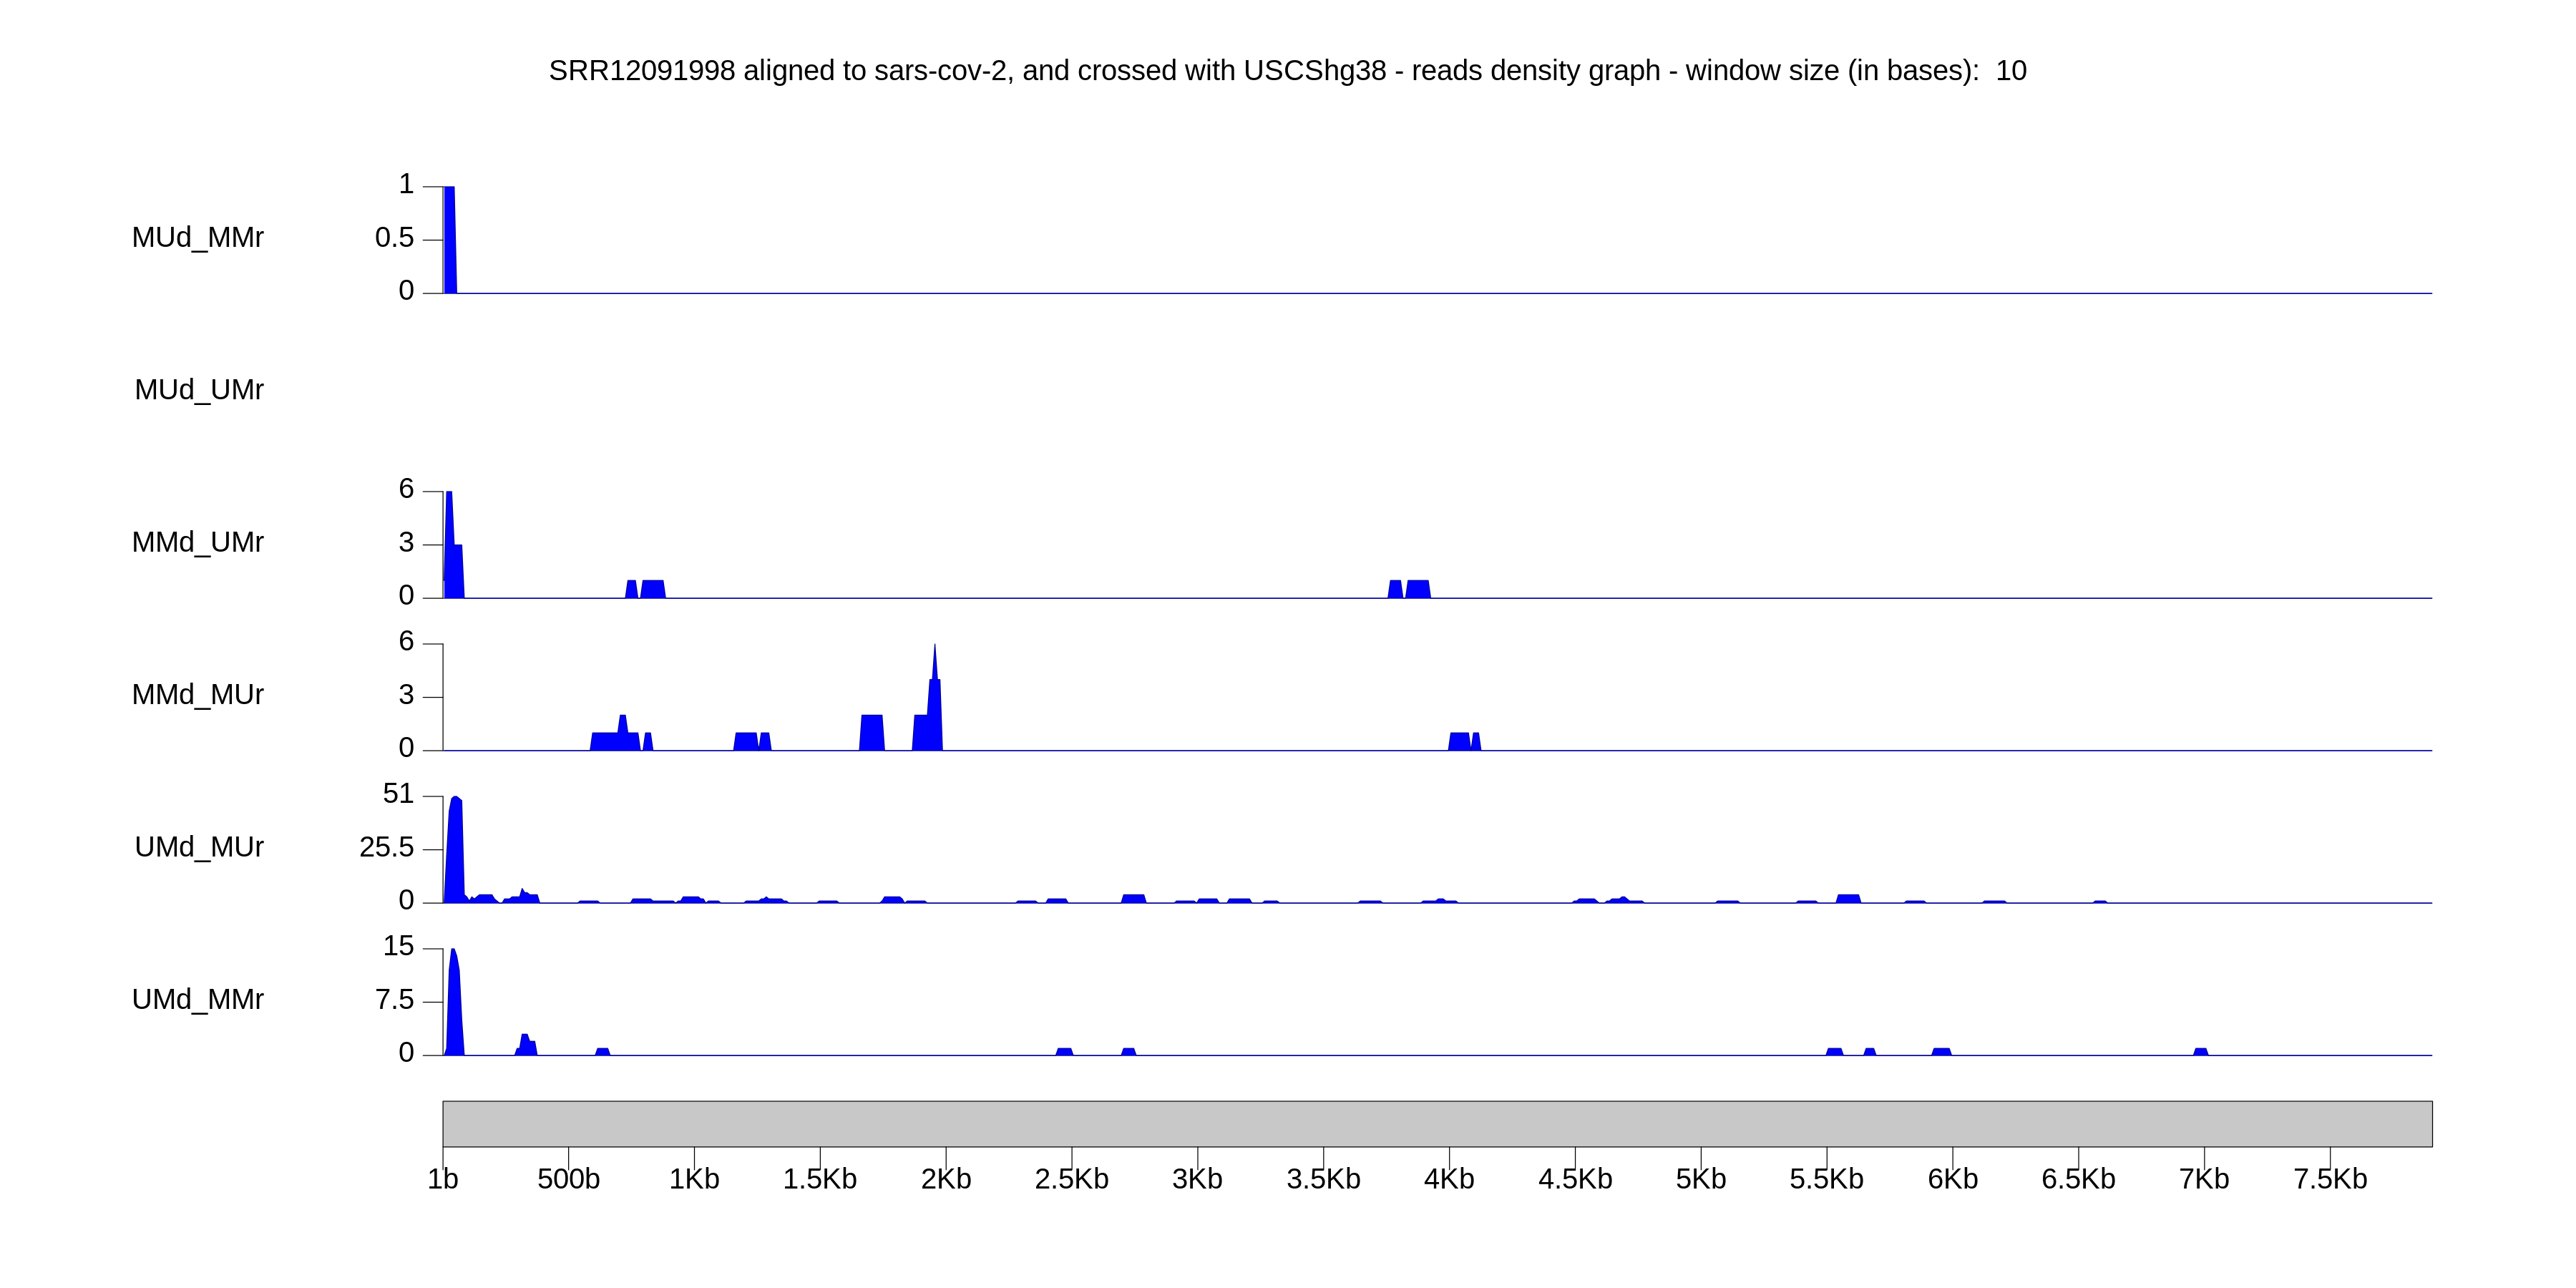

In [758]:
options(repr.plot.width=30, repr.plot.height=15)
create_viz(graph_type="donor", 
           ref_genome=donor_ref_genome, 
           granges = list(donor_UMd_MMr, donor_UMd_MUr, donor_MMd_MUr, donor_MMd_UMr, donor_MUd_UMr, donor_MUd_MMr), 
           granges_labels = list("UMd_MMr", "UMd_MUr",  "MMd_MUr", "MMd_UMr", "MUd_UMr", "MUd_MMr"),
           title_prepend = paste(srr_name, ' aligned to ', donor_name, ', and crossed with ', recipient_name, sep = ""))

In [759]:
granges <- list()
granges_labels <- list()
granges_names <- list("donor_UMd_MMr", "donor_UMd_MUr",  "donor_MMd_MUr", "donor_MMd_UMr", "donor_MUd_UMr", "donor_MUd_MMr")
substrRight <- function(x, n){ substr(x, nchar(x)-n+1, nchar(x)) }
for (element in granges_names) { if (exists(element)){ 
    granges[[length(granges) + 1]] <- get(element) 
    granges_labels[[length(granges_labels) + 1]] <- substrRight(element, 7) } }
table <- print_summary_table(table_type = "donor", granges, granges_labels, min_num_crossings = 3, min_num_reads = 1)

chr,start,stop,num_crossings,unique_crossings,num_reads
MN908947.3,24310,29903,6,"UMd_MMr, UMd_MUr, MMd_MUr, MMd_UMr, MUd_UMr, MUd_MMr",9208
MN908947.3,3,113,4,"UMd_MMr, UMd_MUr, MMd_UMr, MUd_MMr",73
MN908947.3,21804,22522,4,"UMd_MMr, UMd_MUr, MMd_MUr, MMd_UMr",51
MN908947.3,23447,24195,4,"UMd_MMr, UMd_MUr, MMd_MUr, MMd_UMr",46
MN908947.3,21540,21801,4,"UMd_MMr, UMd_MUr, MMd_MUr, MMd_UMr",28
MN908947.3,22558,22712,4,"UMd_MMr, UMd_MUr, MMd_MUr, MMd_UMr",12
MN908947.3,681,916,3,"UMd_MUr, MMd_MUr, MMd_UMr",8
MN908947.3,18837,19032,3,"UMd_MMr, UMd_MUr, MMd_MUr",7
MN908947.3,23148,23311,3,"UMd_MMr, UMd_MUr, MMd_UMr",7
MN908947.3,15216,15310,3,"UMd_MMr, UMd_MUr, MMd_MUr",5


In [ ]:
granges <- list()
granges_labels <- list()
granges_names <- list("donor_UMd_MMr", "donor_UMd_MUr",  "donor_MMd_MUr", "donor_MMd_UMr", "donor_MUd_UMr", "donor_MUd_MMr")
substrRight <- function(x, n){ substr(x, nchar(x)-n+1, nchar(x)) }
for (element in granges_names) { if (exists(element)){ 
    granges[[length(granges) + 1]] <- get(element) 
    granges_labels[[length(granges_labels) + 1]] <- substrRight(element, 7) } }
table <- print_summary_table(table_type = "donor", granges, granges_labels, min_num_crossings = 3, min_num_reads = 3)

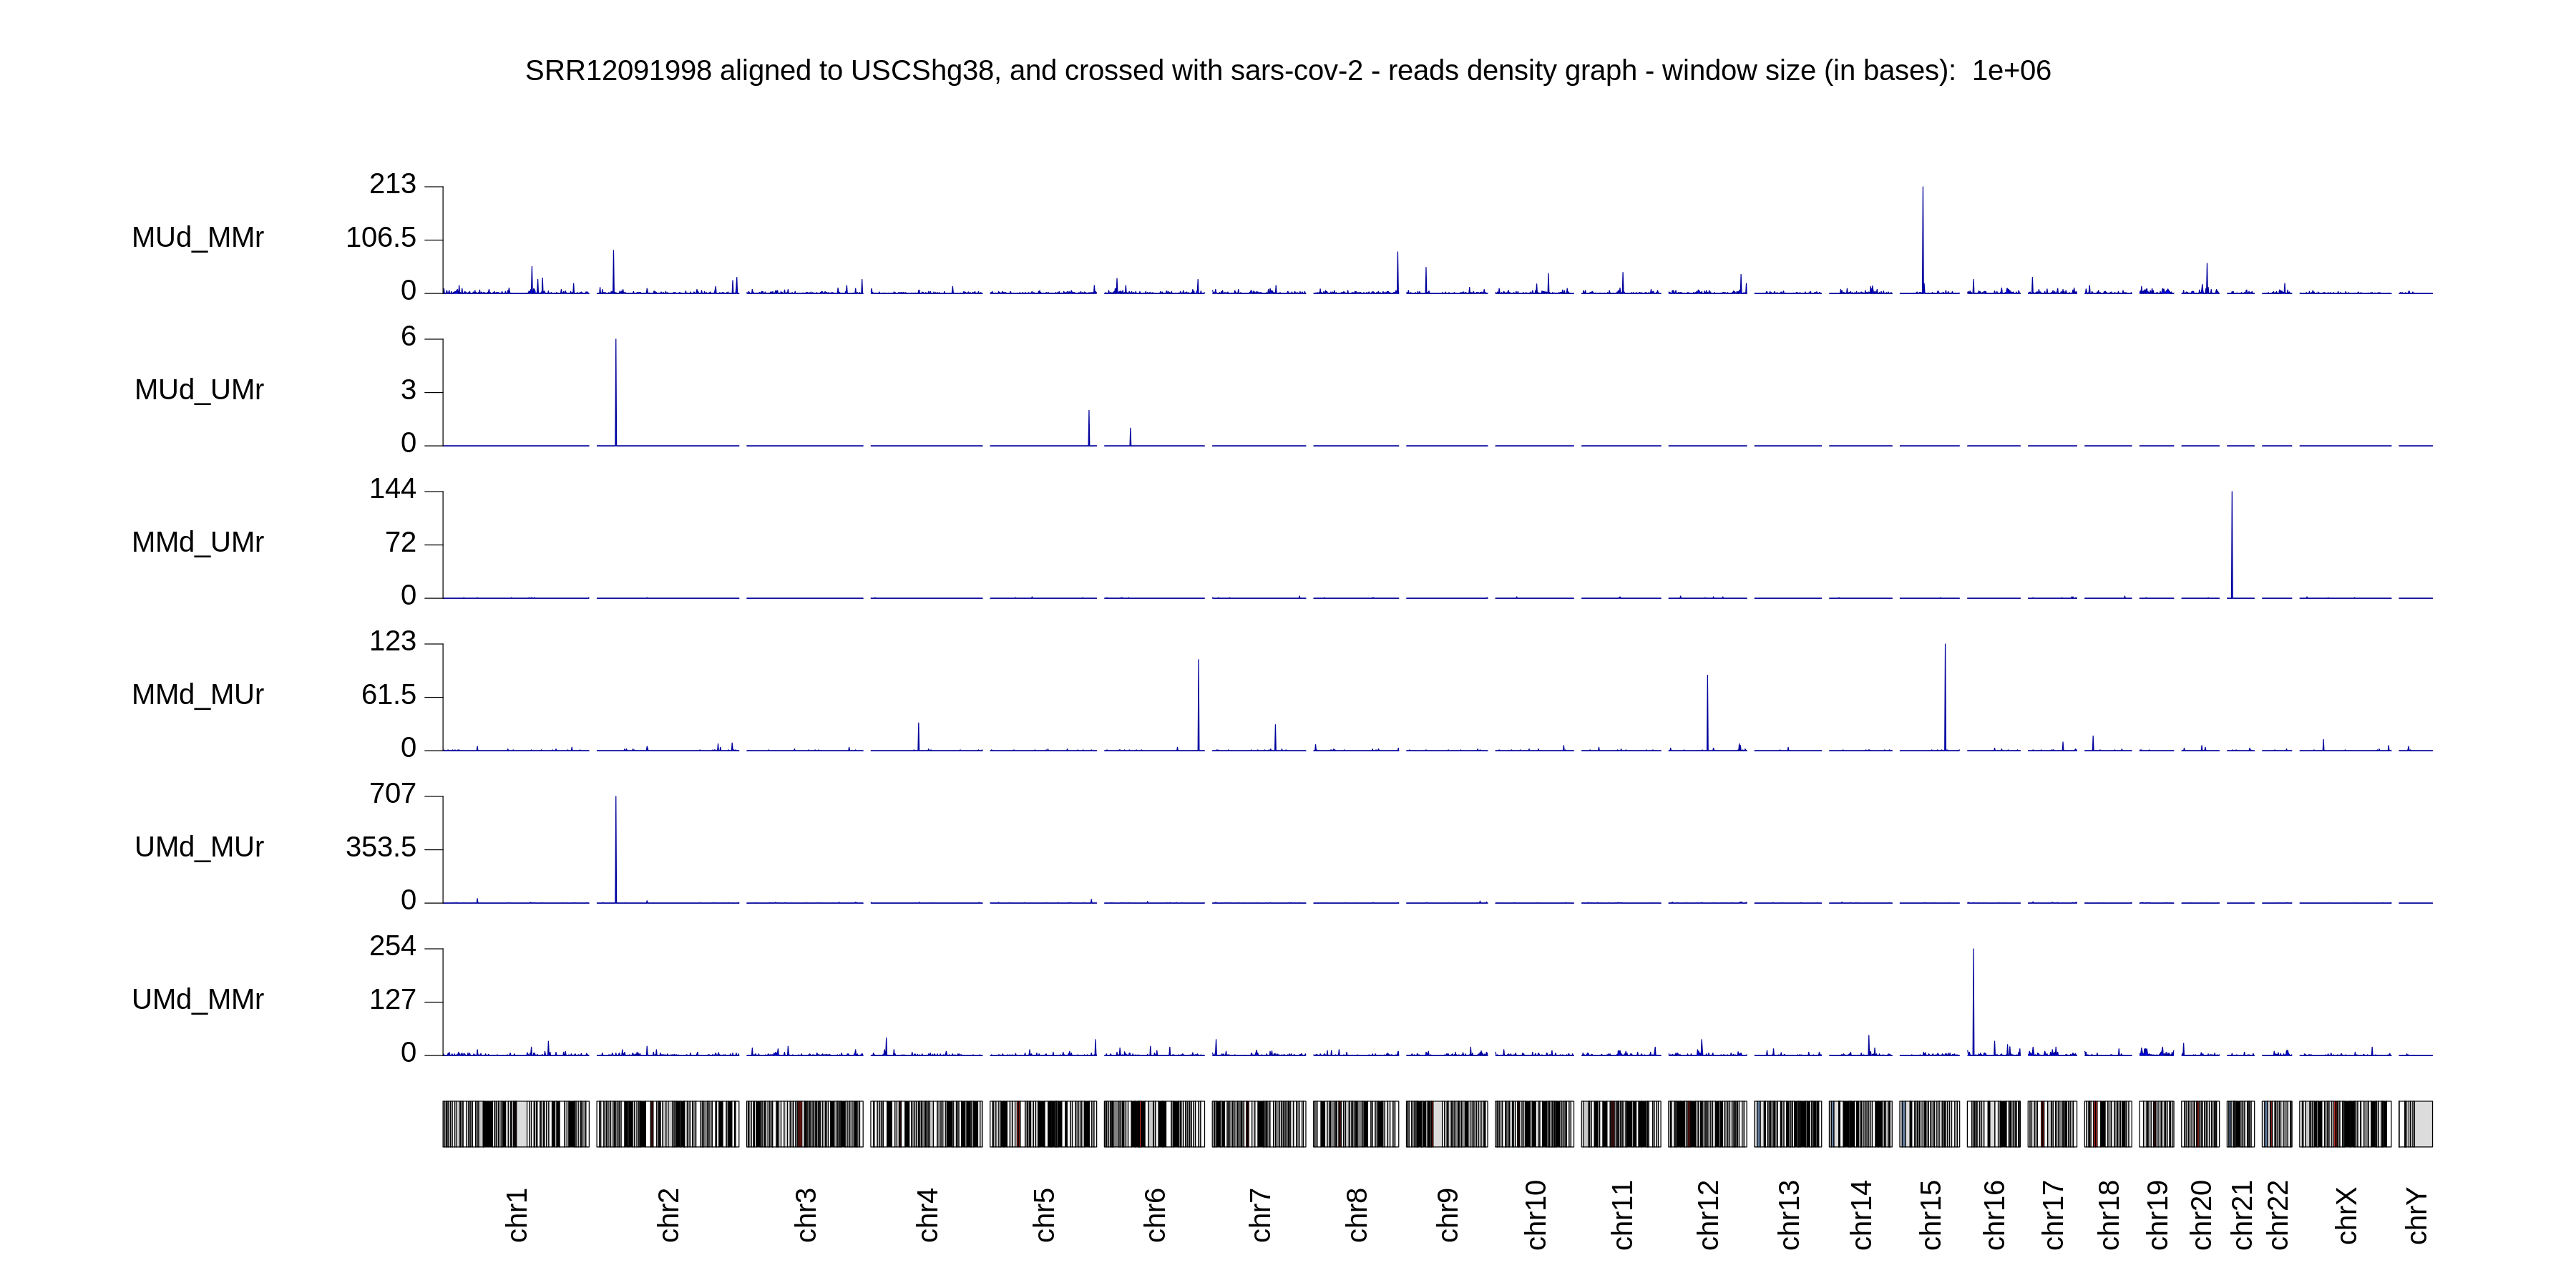

In [761]:
options(repr.plot.width=30, repr.plot.height=15)
create_viz(graph_type="recipient", 
           ref_genome="hg38", 
           granges = list(recip_UMd_MMr, recip_UMd_MUr, recip_MMd_MUr, recip_MMd_UMr, recip_MUd_UMr, recip_MUd_MMr), 
           granges_labels = list("UMd_MMr", "UMd_MUr",  "MMd_MUr", "MMd_UMr", "MUd_UMr", "MUd_MMr"),
           title_prepend = paste(srr_name, ' aligned to ', recipient_name, ', and crossed with ', donor_name, sep = ""))

In [762]:
granges <- list()
granges_labels <- list()
granges_names <- list("recip_UMd_MMr", "recip_UMd_MUr",  "recip_MMd_MUr", "recip_MMd_UMr", "recip_MUd_UMr", "recip_MUd_MMr")
substrRight <- function(x, n){ substr(x, nchar(x)-n+1, nchar(x)) }
for (element in granges_names) { if (exists(element)){ 
    granges[[length(granges) + 1]] <- get(element) 
    granges_labels[[length(granges_labels) + 1]] <- substrRight(element, 7) } }
data2viz <- print_summary_table(table_type = "recipient", granges, granges_labels, min_num_crossings = 3, min_num_reads = 1)

chr,start,stop,num_crossings,unique_crossings,num_reads,gene_name,sequence
chr1,58783686,58784059,3,"UMd_MMr, UMd_MUr, MMd_MUr",41,JUN,TCTGCCACTTGTCTCCGGTCCTCCCAGCCGGGAAAGTTCTTTGCTGCTGCAGCCGCTCGCCGACTTCCCCCGGCGGGCGCGTGGGTACCGCTGCTTTCCGCCGCTGTCAACAGCGCCTGGGCAGCAGGGCTCTCCTCCCGGGGGCGGCTGGAGACCAGGCTCTCTGGACACTCCCGAAACACCAGCCCGGGAGCCACAGGCGCTAGCTCTGGGCAGTTAGAGAGAAGGTGAAAAGAAAATAAGATTTGCAGTTCGGACTATACTGCCGACCTGGCTGGCTGGCTGTGTCTGTCTGTCTGCCTGACTCCGCGCACCTCCACTCCCGCCTCGCTGCTTCAGCCACACTCAGTGCAACTCTGAGCCCTTATCCAGCC
chr5,172770851,172771188,3,"UMd_MMr, UMd_MUr, MMd_MUr",27,DUSP1,AGCGAAGAAGGAGCGGCAGTCCAGCAGCAGGCATTGCGCCGCTCGCTCCCCCAGCAGCGCCCGCAGGCCTCCAGCGTCCAGGGTGCCCACTTCCATGACCATGGCCGGCCTCAGCGCCCCCAGCGTGATCGGCCCTGCGGTGCTCTTTGTCTGTTCTCGGGGCCAAGGGCAGGGCGGCGCTTTTCGAGGAAAAGCTAGACCCCCGGGTCTCTCTGCGCCGAACCAAAAGCCGCTTTTGGACTGAGAGAGGAGCGTCACGCGGGGCTCCGGGCTCCTCGGCTTCTTCGCGGTTCCCCCGACTGCCCCTCCGACCCGCGTCGCACACACAGCCCAAATGT
chr9,125241116,125241339,3,"UMd_MMr, UMd_MUr, MMd_MUr",21,HSPA5,GAGAGCTTCATCTTGCCAGCCAGTTGGGCAGCAGCAGGCAGTCCAGCCACAGGCCGTAGCACAGGAGCACAGCGCAATTTCCGACTTGCAGGCGGCAGGGGCCCGGGGTCACAAGGCGCCACGAACCAGGCGAAGGGCAGGTCTAGAAATACAGGCCGCGGCGCTTCCCTCTCACACTCGCGAAACACCCCAATAGGTCAATCTGTCTGTGCTGTCTTGGCCGG
chr2,85667678,85667807,3,"UMd_MMr, UMd_MUr, MMd_MUr",7,SFTPB,CGGCTCCCACATGTCCCCAGACTTCCTGTAGGCAATGCCCTAGGGCTCTGCACTGCAATGCTTGCTCCAGGCTTTGGCACCAGAACTCAGGGCCCTGGGCACAGGCCAAGGATGAGGTGGTCCAGGCAGC


In [763]:
granges <- list()
granges_labels <- list()
granges_names <- list("recip_UMd_MMr", "recip_UMd_MUr",  "recip_MMd_MUr", "recip_MMd_UMr", "recip_MUd_UMr", "recip_MUd_MMr")
substrRight <- function(x, n){ substr(x, nchar(x)-n+1, nchar(x)) }
for (element in granges_names) { if (exists(element)){ 
    granges[[length(granges) + 1]] <- get(element) 
    granges_labels[[length(granges_labels) + 1]] <- substrRight(element, 7) } }
table <- print_summary_table(table_type = "recipient", granges, granges_labels, min_num_crossings = 1, min_num_reads = 3)

In [764]:
chr <- toString(data2viz[1,]$chr)
start <- min(data2viz[chr == toString(data2viz[1,]$chr)]$start)
end <- max(data2viz[chr == toString(data2viz[1,]$chr)]$stop)
extend_left <- 1000
extend_right <- 1000

In [765]:
options(ucscChromosomeNames=TRUE)

gr_track <- UcscTrack(genome = "hg38", 
                      table = "ncbiRefSeq", 
                      track = 'NCBI RefSeq', 
                      trackType = "GeneRegionTrack",
                      chromosome = chr, 
                      rstarts = "exonStarts", 
                      rends = "exonEnds",
                      gene = "name", 
                      symbol = 'name', 
                      transcript = "name",
                      strand = "strand", 
                      showID = TRUE, 
                      geneSymbol = TRUE, 
                      showBandId = TRUE,
                      showID = TRUE,
                      name = "Gene Track", 
                      min.height = 2,
                      max.height = 3, cex.group = 1)


z <- ranges(gr_track)
mcols(z)$symbol <- mapIds(org.Hs.eg.db, 
                          gsub("\\.[1-9]$", "", mcols(z)$symbol), 
                          "SYMBOL", 
                          "REFSEQ")
ranges(gr_track) <- z

g_track <- GenomeAxisTrack()

'select()' returned 1:1 mapping between keys and columns



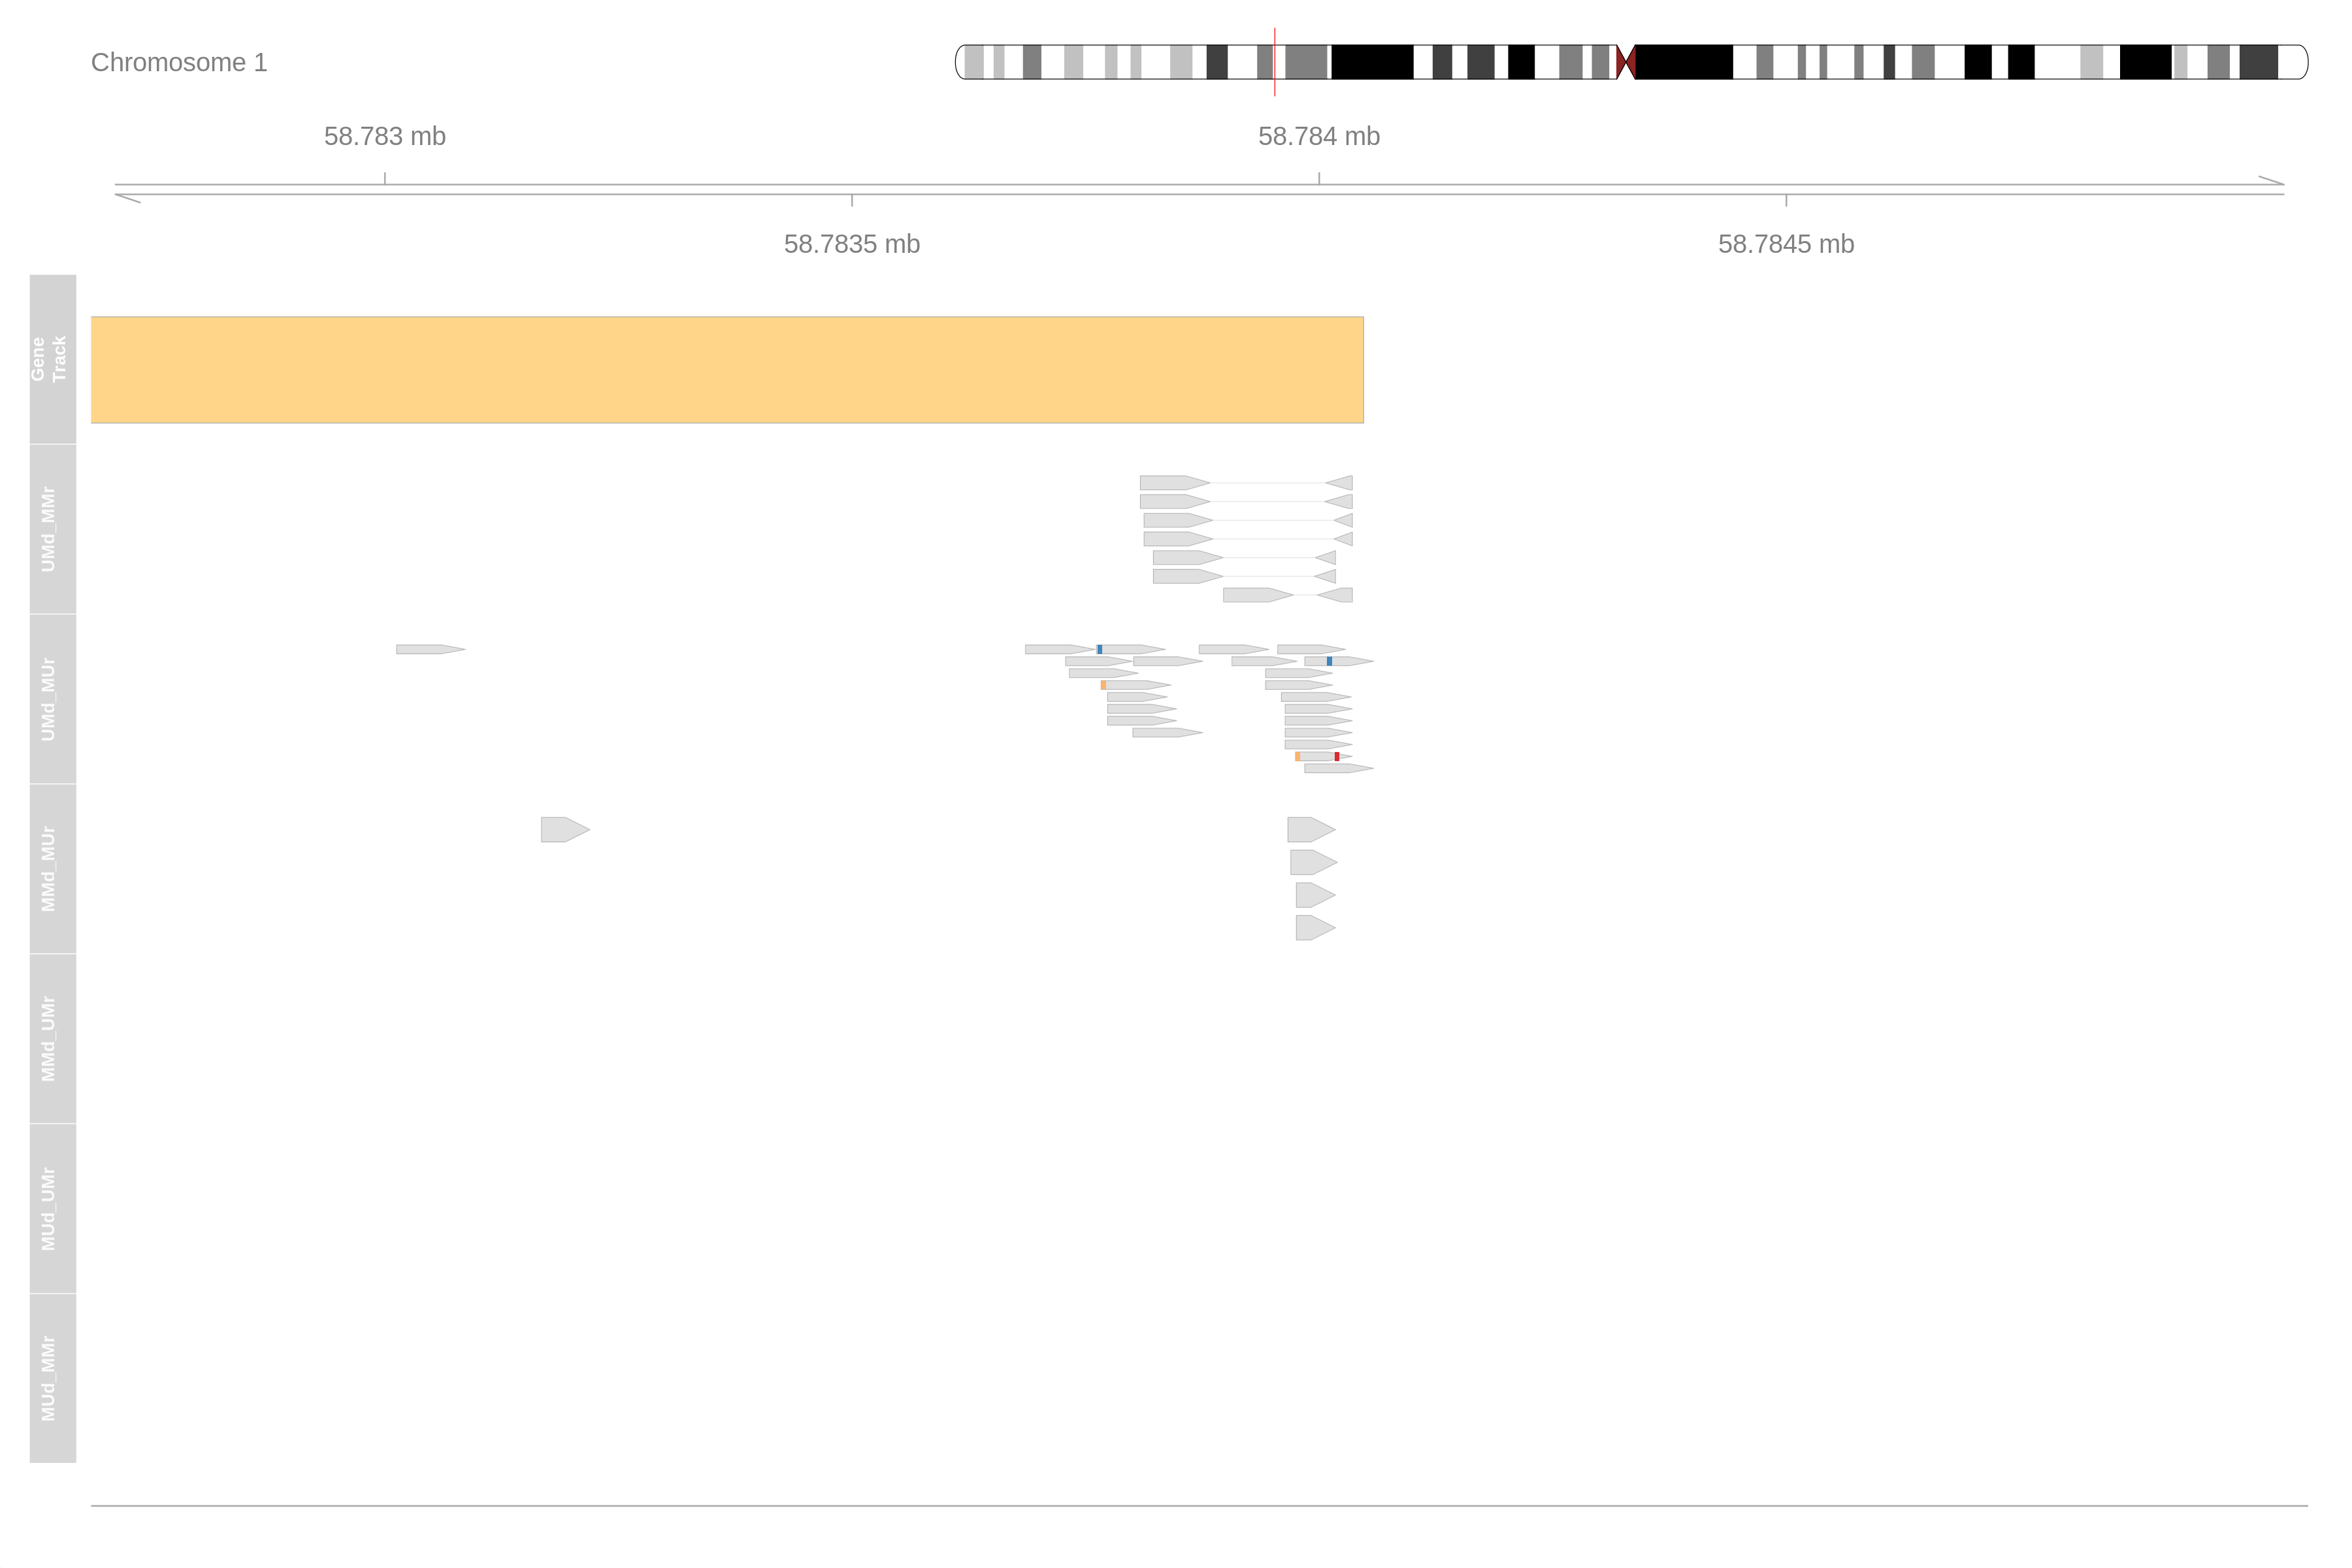

In [766]:
options(repr.plot.width=30, repr.plot.height=20)

s_track <- SequenceTrack(readDNAStringSet(recipient_ref_genome), ex=0.6)

i_track <- IdeogramTrack(genome = "hg38", chromosome = chr,
                        from = as.numeric(start) - extend_left, 
                        to = as.numeric(end) + extend_right,
                        showId = TRUE, 
                        showBandId = TRUE,
                        cex.bands = 0.4)

a_tracks <- lapply(granges_labels, FUN = function(x) AlignmentsTrack(get(paste("recip_",x,".bam", sep = "")), name = x, isPaired = TRUE, 
                                                         stacking = 'squish', alpha = 0.95, chromosome = chr,
                                                         min.height = 2, max.height = 10, type = "pileup"))

plotTracks(c(i_track, g_track, gr_track, a_tracks, s_track), 
           chromosome = chr,
           col.main="mediumblue",
           cex = 1, fontsize = 24,
           transcriptAnnotation = "symbol",
           from = as.numeric(start), to = as.numeric(end), 
           extend.left = extend_left, extend.right = extend_right, just.group = 'above',
           title.width = 0.3, sizes = c(0.5,1,1,replicate(length(granges_labels), 1),0.5))